# dev - notebook - big_five_personality_test

In [1]:
import numpy as np
import pandas as pd

In [2]:
df_start = pd.read_csv("data/data-final.csv", sep="\t")

In [3]:
df_start.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [4]:
df = df_start.drop(columns=['dateload', 'screenw', 'screenh', 'introelapse', 'testelapse', 'endelapse', 'IPC', 'country', 'lat_appx_lots_of_err', 'long_appx_lots_of_err'])

In [5]:
usable_columns = [column for column in df.columns if column.endswith("_E") == False]
df = df[usable_columns].dropna(how="any").astype(int).reset_index(drop=True)

In [6]:
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4,1,5,2,5,1,5,2,4,1,...,5,1,4,1,4,1,5,3,4,5
1,3,5,3,4,3,3,2,5,1,5,...,1,2,4,2,3,1,4,2,5,3
2,2,3,4,4,3,2,1,3,2,5,...,5,1,2,1,4,2,5,3,4,4
3,2,2,2,3,4,2,2,4,1,4,...,4,2,5,2,3,1,4,4,3,3
4,3,3,3,3,5,3,3,5,3,4,...,5,1,5,1,5,1,5,3,5,5


In [7]:
questions_mapping = {
    "EXT1":	"I am the life of the party.",
    "EXT2":	"I don't talk a lot.",
    "EXT3":	"I feel comfortable around people.",
    "EXT4":	"I keep in the background.",
    "EXT5":	"I start conversations.",
    "EXT6":	"I have little to say.",
    "EXT7":	"I talk to a lot of different people at parties.",
    "EXT8":	"I don't like to draw attention to myself.",
    "EXT9":	"I don't mind being the center of attention.",
    "EXT10": "I am quiet around strangers.",

    "EST1":	"I get stressed out easily.",
    "EST2":	"I am relaxed most of the time.",
    "EST3":	"I worry about things.",
    "EST4":	"I seldom feel blue.",
    "EST5":	"I am easily disturbed.",
    "EST6":	"I get upset easily.",
    "EST7":	"I change my mood a lot.",
    "EST8":	"I have frequent mood swings.",
    "EST9":	"I get irritated easily.",
    "EST10": "I often feel blue.",

    "AGR1":	"I feel little concern for others.",
    "AGR2":	"I am interested in people.",
    "AGR3":	"I insult people.",
    "AGR4":	"I sympathize with others' feelings.",
    "AGR5":	"I am not interested in other people's problems.",
    "AGR6":	"I have a soft heart.",
    "AGR7":	"I am not really interested in others.",
    "AGR8":	"I take time out for others.",
    "AGR9":	"I feel others' emotions.",
    "AGR10": "I make people feel at ease.",

    "CSN1":	"I am always prepared.",
    "CSN2":	"I leave my belongings around.",
    "CSN3":	"I pay attention to details.",
    "CSN4":	"I make a mess of things.",
    "CSN5":	"I get chores done right away.",
    "CSN6":	"I often forget to put things back in their proper place.",
    "CSN7":	"I like order.",
    "CSN8":	"I shirk my duties.",
    "CSN9":	"I follow a schedule.",
    "CSN10": "I am exacting in my work.",

    "OPN1":	"I have a rich vocabulary.",
    "OPN2":	"I have difficulty understanding abstract ideas.",
    "OPN3":	"I have a vivid imagination.",
    "OPN4":	"I am not interested in abstract ideas.",
    "OPN5":	"I have excellent ideas.",
    "OPN6":	"I do not have a good imagination.",
    "OPN7":	"I am quick to understand things.",
    "OPN8":	"I use difficult words.",
    "OPN9":	"I spend time reflecting on things.",
    "OPN10": "I am full of ideas."
}

questions_selecting = {
    # "EXT1":	"I am the life of the party.",
    # "EXT2":	"I don't talk a lot.",
    "EXT3":	"I feel comfortable around people.",
    # "EXT4":	"I keep in the background.",
    "EXT5":	"I start conversations.",
    "EXT6":	"I have little to say.",
    # "EXT7":	"I talk to a lot of different people at parties.",
    "EXT8":	"I don't like to draw attention to myself.",
    "EXT9":	"I don't mind being the center of attention.",
    # "EXT10": "I am quiet around strangers.",

    "EST1":	"I get stressed out easily.",
    "EST2":	"I am relaxed most of the time.",
    "EST3":	"I worry about things.",
    "EST4":	"I seldom feel blue.", # recheck
    # "EST5":	"I am easily disturbed.",
    # "EST6":	"I get upset easily.",
    # "EST7":	"I change my mood a lot.",
    # "EST8":	"I have frequent mood swings.",
    # "EST9":	"I get irritated easily.",
    "EST10": "I often feel blue.", # recheck

    # not sure
    "AGR1":	"I feel little concern for others.",
    "AGR2":	"I am interested in people.",
    "AGR3":	"I insult people.",
    # "AGR4":	"I sympathize with others' feelings.",
    "AGR5":	"I am not interested in other people's problems.", # recheck
    # "AGR6":	"I have a soft heart.",
    # "AGR7":	"I am not really interested in others.", # recheck
    # "AGR8":	"I take time out for others.",
    "AGR9":	"I feel others' emotions.",
    "AGR10": "I make people feel at ease.",

    "CSN1":	"I am always prepared.",
    # "CSN2":	"I leave my belongings around.",
    "CSN3":	"I pay attention to details.",
    # "CSN4":	"I make a mess of things.",
    # "CSN5":	"I get chores done right away.",
    "CSN6":	"I often forget to put things back in their proper place.",
    "CSN7":	"I like order.",
    "CSN8":	"I shirk my duties.",
    "CSN9":	"I follow a schedule.",
    # "CSN10": "I am exacting in my work.",

    # "OPN1":	"I have a rich vocabulary.",
    "OPN2":	"I have difficulty understanding abstract ideas.",
    "OPN3":	"I have a vivid imagination.",
    "OPN4":	"I am not interested in abstract ideas.",
    # "OPN5":	"I have excellent ideas.",
    # "OPN6":	"I do not have a good imagination.",
    # "OPN7":	"I am quick to understand things.",
    # "OPN8":	"I use difficult words.",
    # "OPN9":	"I spend time reflecting on things.",
    "OPN10": "I am full of ideas."
}

questions_scoring_factor = {
    # 1 = extrovert, -1 = introvert
    "EXT1":	1,
    "EXT2":	-1,
    "EXT3":	1,
    "EXT4":	-1,
    "EXT5":	1,
    "EXT6":	-1,
    "EXT7":	1,
    "EXT8":	-1,
    "EXT9":	1,
    "EXT10": -1,

    # 1 = Assertive, -1 = Turbulent
    "EST1":	-1,
    "EST2":	1,
    "EST3":	-1,
    "EST4":	1,
    "EST5":	-1,
    "EST6":	-1,
    "EST7":	-1,
    "EST8":	-1,
    "EST9":	-1,
    "EST10": -1,

    # 1 = Feeling, -1 Thinking
    "AGR1":	-1,
    "AGR2":	1,
    "AGR3":	-1,
    "AGR4":	1,
    "AGR5":	-1,
    "AGR6":	1,
    "AGR7":	-1,
    "AGR8":	1,
    "AGR9":	1,
    "AGR10": 1,

    # 1 = Judging, -1 = Perception
    "CSN1":	1,
    "CSN2":	-1,
    "CSN3":	1,
    "CSN4":	-1,
    "CSN5":	1,
    "CSN6":	-1,
    "CSN7":	1,
    "CSN8":	-1,
    "CSN9":	1,
    "CSN10": 1,

    # 1 = Intuitives, -1 = Sensors
    "OPN1":	1,
    "OPN2":	-1,
    "OPN3":	1,
    "OPN4":	-1,
    "OPN5":	1,
    "OPN6":	-1,
    "OPN7":	1,
    "OPN8":	1,
    "OPN9":	1,
    "OPN10": 1
}

In [8]:
type_of_qa = ["EXT", "AGR", "CSN", "EST", "OPN"]

In [9]:
qa_type_col = {qa_type: [column for column in df.columns if column.startswith(qa_type)] for qa_type in type_of_qa}
print(qa_type_col)

{'EXT': ['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10'], 'AGR': ['AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10'], 'CSN': ['CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10'], 'EST': ['EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10'], 'OPN': ['OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10']}


In [10]:
df[qa_type_col["EXT"]].head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10
0,4,1,5,2,5,1,5,2,4,1
1,3,5,3,4,3,3,2,5,1,5
2,2,3,4,4,3,2,1,3,2,5
3,2,2,2,3,4,2,2,4,1,4
4,3,3,3,3,5,3,3,5,3,4


## cluster mbti type for each letter

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [12]:
kmeans_model = KMeans(
    n_clusters=2,
    random_state=0
)

In [13]:
output_df = pd.DataFrame()

In [14]:
for key, value in qa_type_col.items():
    kmeans_model.fit(df[qa_type_col[key]])
    output_df[f"{key}_cluster"] = kmeans_model.labels_

In [15]:
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4,1,5,2,5,1,5,2,4,1,...,5,1,4,1,4,1,5,3,4,5
1,3,5,3,4,3,3,2,5,1,5,...,1,2,4,2,3,1,4,2,5,3
2,2,3,4,4,3,2,1,3,2,5,...,5,1,2,1,4,2,5,3,4,4
3,2,2,2,3,4,2,2,4,1,4,...,4,2,5,2,3,1,4,4,3,3
4,3,3,3,3,5,3,3,5,3,4,...,5,1,5,1,5,1,5,3,5,5


In [16]:
output_df.head()

,EXT_cluster,AGR_cluster,CSN_cluster,EST_cluster,OPN_cluster
0,0,0,0,0,0
1,1,0,1,0,1
2,1,0,1,0,0
3,1,0,0,0,0
4,1,0,1,0,0


In [17]:
print(df.shape)
print(output_df.shape)

(1013558, 50)
(1013558, 5)


## automate classify cluster

In [18]:
mbti_map_dict = {
    "EXT": ["E", "I"],
    "EST": ["A", "T"],
    "AGR": ["F", "T"],
    "CSN": ["P", "J"],
    "OPN": ["N", "S"],
}

In [19]:
# create intermediate table for classifying cluster by multiplied by "questions_scoring_factor" dict 
df_temp = df.copy()
df_temp = df_temp.mul(questions_scoring_factor)

target_dfs = []

for qa_type, columns_list in qa_type_col.items():
    # assign target column
    qa_type_cluster = f"{qa_type}_cluster"
    qa_type_map = f"{qa_type}_map"

    # median of cluster 0
    classifier_df = pd.concat([df_temp[qa_type_col[qa_type]], output_df[qa_type_cluster]], axis=1) \
                        .groupby(by=qa_type_cluster) \
                        .median() \
                        .reset_index()
    compare_cluster = classifier_df.loc[classifier_df[qa_type_cluster] == 0].drop(columns=[qa_type_cluster]).to_numpy().ravel()

    # median of entire group
    base_cluster = np.array(df_temp[qa_type_col[qa_type]].median())

    # prep sub output table
    sub_output = pd.concat([df_temp[qa_type_col[qa_type]], output_df[qa_type_cluster]], axis=1)

    # classify cluster to mbti
    if int((compare_cluster >= base_cluster).sum()) > 5:
        sub_output[qa_type_map] = sub_output[qa_type_cluster].map({
            0: mbti_map_dict.get(qa_type)[0],
            1: mbti_map_dict.get(qa_type)[1],
        })
    else:
        sub_output[qa_type_map] = sub_output[qa_type_cluster].map({
            0: mbti_map_dict.get(qa_type)[1],
            1: mbti_map_dict.get(qa_type)[0],
        })
    
    # keep classified class
    target_dfs.append(sub_output[[qa_type_cluster, qa_type_map]])

In [20]:
raw_output = pd.concat(target_dfs, axis=1)
raw_output.head()

,EXT_cluster,EXT_map,AGR_cluster,AGR_map,CSN_cluster,CSN_map,EST_cluster,EST_map,OPN_cluster,OPN_map
0,0,E,0,F,0,J,0,A,0,N
1,1,I,0,F,1,P,0,A,1,S
2,1,I,0,F,1,P,0,A,0,N
3,1,I,0,F,0,J,0,A,0,N
4,1,I,0,F,1,P,0,A,0,N


In [21]:
target = raw_output["EXT_map"] + raw_output["OPN_map"] + raw_output["AGR_map"] + raw_output["CSN_map"] + "-" + raw_output["EST_map"]
target.head()

0    ENFJ-A
1    ISFP-A
2    INFP-A
3    INFJ-A
4    INFP-A
dtype: object

# MBTI Inference

In [22]:
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4,1,5,2,5,1,5,2,4,1,...,5,1,4,1,4,1,5,3,4,5
1,3,5,3,4,3,3,2,5,1,5,...,1,2,4,2,3,1,4,2,5,3
2,2,3,4,4,3,2,1,3,2,5,...,5,1,2,1,4,2,5,3,4,4
3,2,2,2,3,4,2,2,4,1,4,...,4,2,5,2,3,1,4,4,3,3
4,3,3,3,3,5,3,3,5,3,4,...,5,1,5,1,5,1,5,3,5,5


In [23]:
target.head()

0    ENFJ-A
1    ISFP-A
2    INFP-A
3    INFJ-A
4    INFP-A
dtype: object

Text(0.5, 1.0, 'Feature Correlation: Pearson')

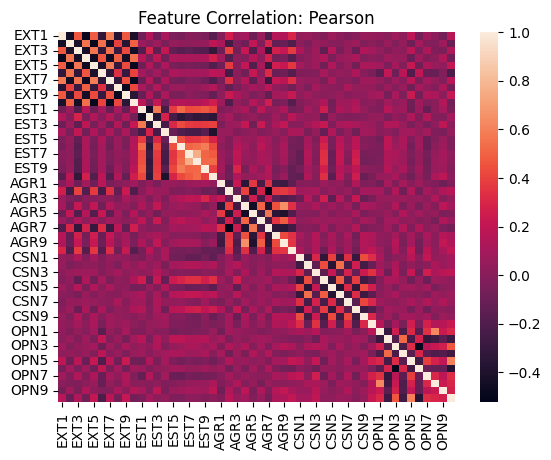

In [25]:
import seaborn as sns
sns.heatmap(df.corr(method="pearson"))
plt.title("Feature Correlation: Pearson")

In [26]:
# pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# linear model
from sklearn.linear_model import LogisticRegression

# boosting trees

# evaluation
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

Pre-processing

In [27]:
# split for test
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=0)

# encode target
target_encoder = LabelEncoder()
target_encoder.fit(y_train)
target_encoded = target_encoder.transform(y_train)
y_test_encoded = target_encoder.transform(y_test)

# revert back to labels
# target_encoder.inverse_transform(target_encoded)

In [31]:
import pickle
with open("ml_model/encoder.pkl", "wb") as f:
    pickle.dump(target_encoder, f)

In [32]:
# loaded_encoder = pickle.load(open("ml_model/encoder.pkl", "rb"))
# loaded_encoder.inverse_transform(target_encoded)

Train Model

In [33]:
def mbti_eval_classification(y_true, y_pred, rounding):
    # evaluate
    accuracy = accuracy_score(y_true=y_true, y_pred=y_pred)
    precision = precision_score(y_true=y_true, y_pred=y_pred, average='macro')
    recall = recall_score(y_true=y_true, y_pred=y_pred, average='macro')
    f1 = f1_score(y_true=y_true, y_pred=y_pred, average='macro')

    # rounding
    rounding = 4
    accuracy = round(accuracy, rounding)
    precision = round(precision, rounding)
    recall = round(recall, rounding)
    f1 = round(f1, rounding)

    # print, return
    print(f"accuracy_score: {accuracy}")
    print(f"precision_score: {precision}")
    print(f"recall_score: {recall}")
    print(f"f1_score: {f1}")

    return accuracy, precision, recall, f1
    

def mbti_train_eval(estimator, X_train, X_test, y_train_encoded, y_test_encoded, rounding=4):
    estimator.fit(X_train, y_train_encoded)
    y_pred = estimator.predict(X_test)

    mbti_eval_classification(y_true=y_test_encoded, y_pred=y_pred, rounding=rounding)

    return estimator

In [34]:
linear_model = LogisticRegression(max_iter=300, random_state=0)

print("model: LogisticRegression")
mbti_train_eval(
    estimator=linear_model, 
    X_train=X_train,
    X_test=X_test,
    y_train_encoded=target_encoded, 
    y_test_encoded=y_test_encoded,
    rounding=4
)

model: LogisticRegression


c:\Users\HP\Desktop\ken\Project\Project ML\pyenv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy_score: 0.908
precision_score: 0.8991
recall_score: 0.8943
f1_score: 0.8966


LogisticRegression(max_iter=300, random_state=0)

permutation feature importance EDA & feature selection 

In [35]:
result = permutation_importance(
    estimator=linear_model, 
    X=X_train, 
    y=target_encoded,
    scoring="f1_macro",
    random_state=0
)

Text(0.5, 0, 'Decrease in accuracy score')

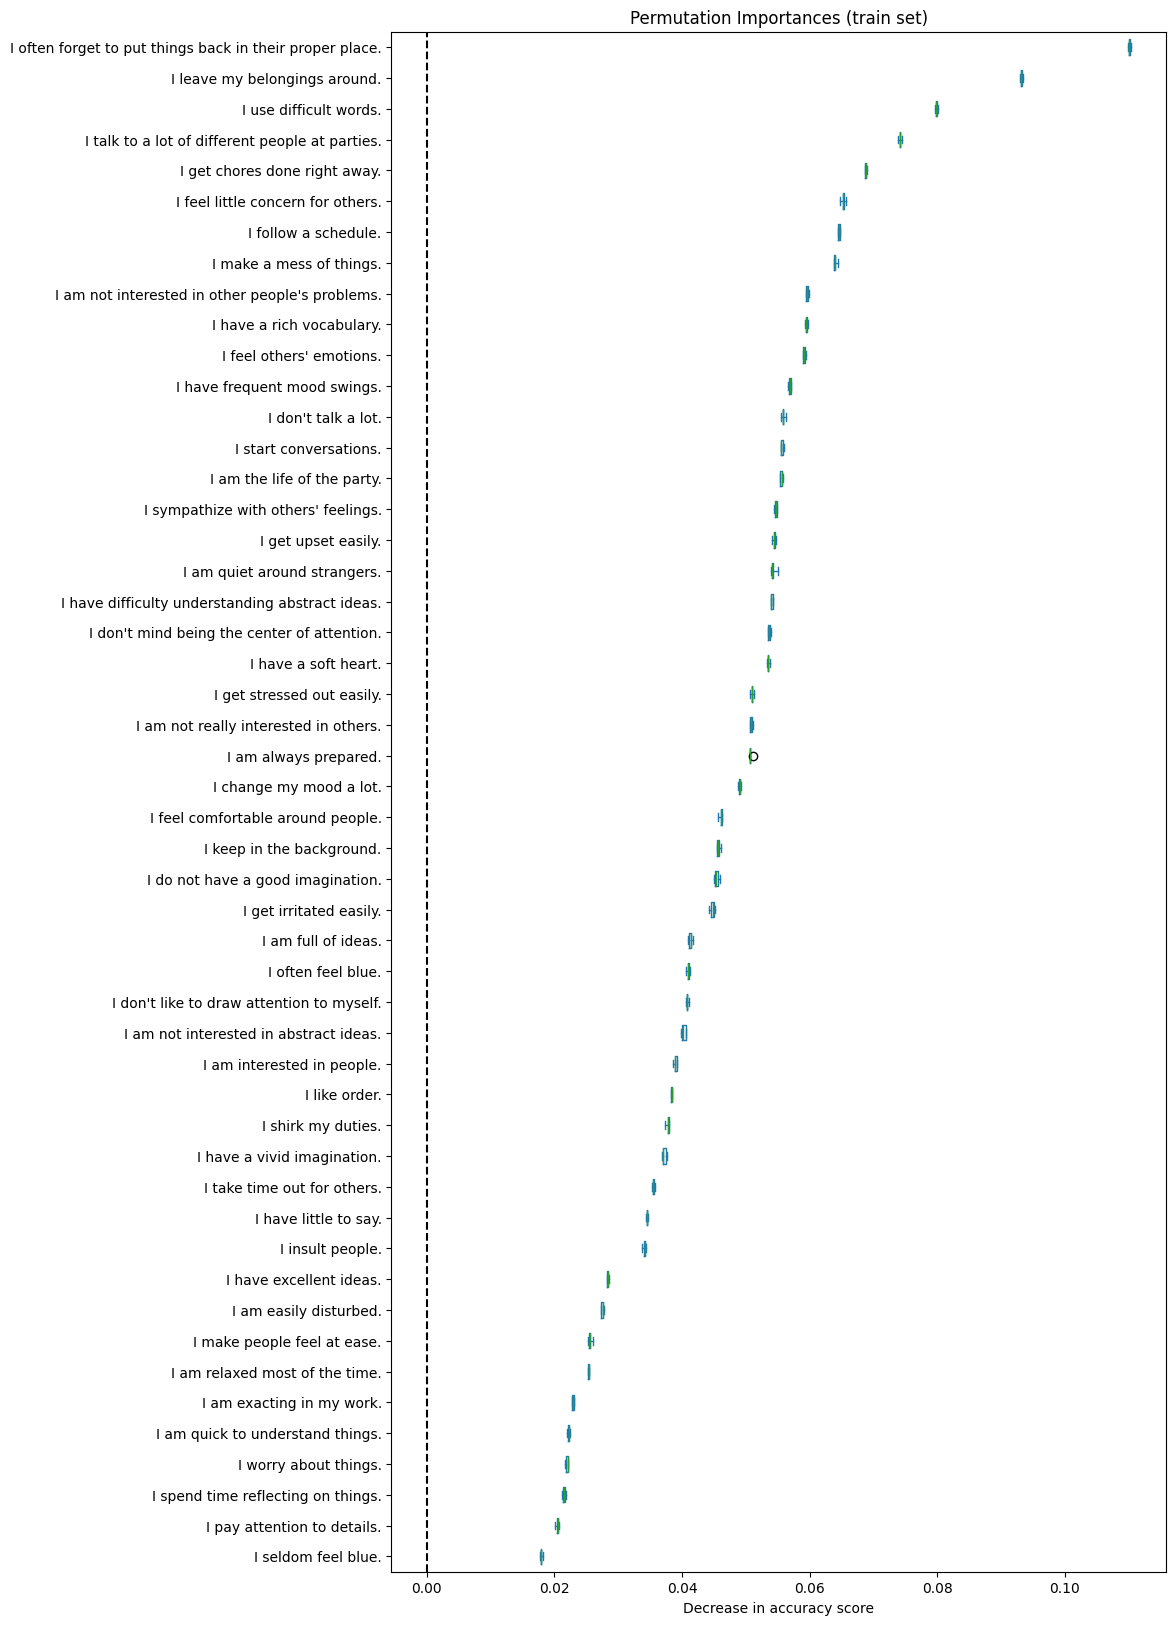

In [36]:
sorted_importances_idx = result["importances_mean"].argsort()
importances = pd.DataFrame(
    result["importances"][sorted_importances_idx].T,
    columns=X_train.columns[sorted_importances_idx].map(mapper=questions_mapping),
)
ax = importances.plot.box(vert=False, whis=10, figsize=(10, 20))
ax.set_title("Permutation Importances (train set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")

In [37]:
new_features = X_train.columns[sorted_importances_idx][::-1][:30]
target_labels = list(X_train.columns[sorted_importances_idx].map(mapper=questions_mapping))[::-1][:30]

excluded some question

In [38]:
new_features

Index(['CSN6', 'CSN2', 'OPN8', 'EXT7', 'CSN5', 'AGR1', 'CSN9', 'CSN4', 'AGR5',
       'OPN1', 'AGR9', 'EST8', 'EXT2', 'EXT5', 'EXT1', 'AGR4', 'EST6', 'EXT10',
       'OPN2', 'EXT9', 'AGR6', 'EST1', 'AGR7', 'CSN1', 'EST7', 'EXT3', 'EXT4',
       'OPN6', 'EST9', 'OPN10'],
      dtype='object')

In [39]:
# excluded some questions selected by developer
selected_features = set(new_features)
selected_features = list(selected_features - (set(questions_mapping.keys()) - set(questions_selecting.keys())))

# mark index to the elements
sort_order_dict = {item: index for index, item in enumerate(new_features)}

# Create a list of tuples (tuple, index)
tuple_list = [(col, sort_order_dict[col]) for col in selected_features]

# Sort the list of tuples by index using the sort() function and a lambda function as the key
tuple_list.sort(key=lambda x: x[1])

# Append the sorted tuples to the result list
sorted_selected_features = [col for col, index in tuple_list]

# print result sort col
# print(len(sorted_selected_features))
map_questions = list(map(lambda x: questions_mapping[x], sorted_selected_features))


In [40]:
sorted_selected_features

['CSN6',
 'AGR1',
 'CSN9',
 'AGR5',
 'AGR9',
 'EXT5',
 'OPN2',
 'EXT9',
 'EST1',
 'CSN1',
 'EXT3',
 'OPN10']

In [41]:
map_questions

['I often forget to put things back in their proper place.',
 'I feel little concern for others.',
 'I follow a schedule.',
 "I am not interested in other people's problems.",
 "I feel others' emotions.",
 'I start conversations.',
 'I have difficulty understanding abstract ideas.',
 "I don't mind being the center of attention.",
 'I get stressed out easily.',
 'I am always prepared.',
 'I feel comfortable around people.',
 'I am full of ideas.']

In [42]:
{code: qa for code, qa in zip(sorted_selected_features, map_questions)}

{'CSN6': 'I often forget to put things back in their proper place.',
 'AGR1': 'I feel little concern for others.',
 'CSN9': 'I follow a schedule.',
 'AGR5': "I am not interested in other people's problems.",
 'AGR9': "I feel others' emotions.",
 'EXT5': 'I start conversations.',
 'OPN2': 'I have difficulty understanding abstract ideas.',
 'EXT9': "I don't mind being the center of attention.",
 'EST1': 'I get stressed out easily.',
 'CSN1': 'I am always prepared.',
 'EXT3': 'I feel comfortable around people.',
 'OPN10': 'I am full of ideas.'}

In [43]:
input_format = {code: qa for code, qa in zip(new_features[:12], list(map(lambda x: questions_mapping[x], new_features[:12])))}
input_format

{'CSN6': 'I often forget to put things back in their proper place.',
 'CSN2': 'I leave my belongings around.',
 'OPN8': 'I use difficult words.',
 'EXT7': 'I talk to a lot of different people at parties.',
 'CSN5': 'I get chores done right away.',
 'AGR1': 'I feel little concern for others.',
 'CSN9': 'I follow a schedule.',
 'CSN4': 'I make a mess of things.',
 'AGR5': "I am not interested in other people's problems.",
 'OPN1': 'I have a rich vocabulary.',
 'AGR9': "I feel others' emotions.",
 'EST8': 'I have frequent mood swings.'}

In [45]:
# import json
# json.dump(input_format, open("./streamlit/models/input_format.json", "w"))

retrain with top 12 feature with most important

In [46]:
new_features[:12]

Index(['CSN6', 'CSN2', 'OPN8', 'EXT7', 'CSN5', 'AGR1', 'CSN9', 'CSN4', 'AGR5',
       'OPN1', 'AGR9', 'EST8'],
      dtype='object')

In [47]:
linear_model = LogisticRegression(max_iter=300, random_state=0)

print("model: LogisticRegression")
trained_linear_model = mbti_train_eval(
    estimator=linear_model, 
    X_train=X_train[new_features[:12]],
    X_test=X_test[new_features[:12]],
    y_train_encoded=target_encoded, 
    y_test_encoded=y_test_encoded
)

model: LogisticRegression


c:\Users\HP\Desktop\ken\Project\Project ML\pyenv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy_score: 0.4377
precision_score: 0.4118
recall_score: 0.3946
f1_score: 0.4001


In [48]:
import pickle
with open("ml_model/logistic_regression_mbti.bin", "wb") as f:
    pickle.dump(linear_model, f)